# CutOut

In [1]:
import oceanspy as ospy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=12,8

In [2]:
from dask.distributed import Client
client = Client(processes=False)
client

/home/mjimen17/anaconda3/envs/Oceanography/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: inproc://172.23.80.12/4074518/1 Dashboard: http://172.23.80.12:33793/status,Cluster Workers: 1 Cores: 64 Memory: 1.08 TB


In [3]:
from LLC_rearrange import LLCtransformation

## Load from catalog and make OceanSpy Dataset

In [4]:
od = ospy.open_oceandataset.from_catalog('LLC4320', None)

Opening LLC4320.


/home/mjimen17/anaconda3/envs/Oceanography/lib/python3.7/site-packages/oceanspy/open_oceandataset.py:1: UserWarning: ['grid_type'] are not OceanSpy parameters
  """


horizontal grid for LLC4320, a general, curvilinear ocean simulations on the cube-sphere.
Citation:
 * Paper.


# Create Mates for Vector Fields

This becomes increadibly handy for when need to rotate faces, and thus the local X-aligned vector is really is y-aligned.

In [5]:
vars_mates = ['ADVx_SLT','ADVy_SLT','ADVx_TH','ADVy_TH','DFxE_TH', 'DFyE_TH','DFxE_SLT', 'DFyE_SLT', 'maskW', 'maskS',
              'TAUX', 'TAUY', 'U', 'V', 'UVELMASS', 'VVELMASS', 'dxC', 'dyC', 'dxG', 'dyG', 'hFacW','hFacS', 'rAw', 'rAs']
for k in range(int(len(vars_mates) / 2) ):
    nk = 2 * k
    if vars_mates[nk] in od._ds.variables:
        print([vars_mates[nk],vars_mates[nk+1]])
        od._ds[vars_mates[nk]].attrs['mates'] = vars_mates[nk+1]
        od._ds[vars_mates[nk+1]].attrs['mates'] = vars_mates[nk]

['dxC', 'dyC']
['dxG', 'dyG']
['hFacW', 'hFacS']
['rAw', 'rAs']


In [6]:
_ds = od._ds.reset_coords().drop_vars(['CS','PHrefC', 'PHrefF', 'SN', 'k_p1', 'k_l', 'k_u', 'k', 'Z', 'Zl', 'Zu', 'Zp1', 'drF'])

# Transform Data by Rotating Faces

In [7]:
varlist=['Depth', 'SST', 'XC', 'YC', 'dxC', 'dyC', 'dxG', 'dyG'] #
faces=[2,6,10]

In [8]:
DS = LLCtransformation.arctic_crown(_ds.isel(time=slice(0,2)), varlist, centered='Atlantic',faces=faces)

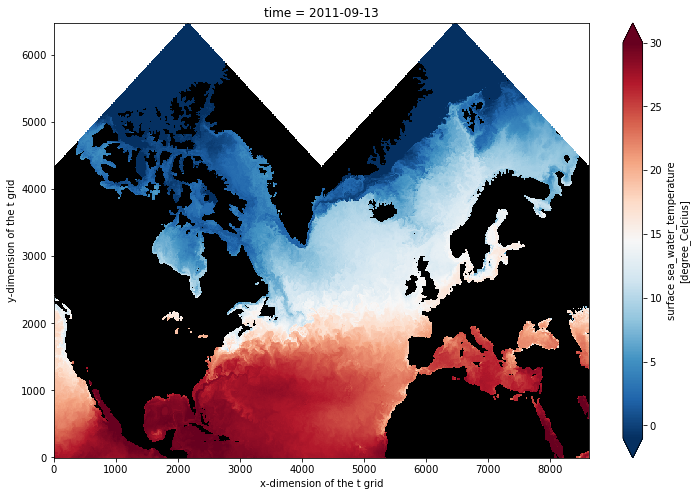

In [9]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['SST'].isel(time=0, X=slice(0,-1,10),Y=slice(0,-1,10))).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0)).plot(cmap='RdBu_r', vmin=-1, vmax=30)
plt.show()

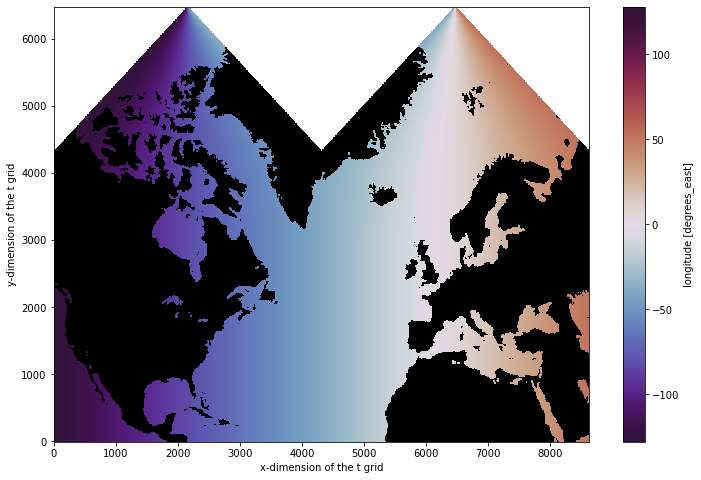

In [10]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['XC'].isel(X=slice(0,-1,10),Y=slice(0,-1,10))).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0)).plot(cmap='twilight_shifted')
plt.show()

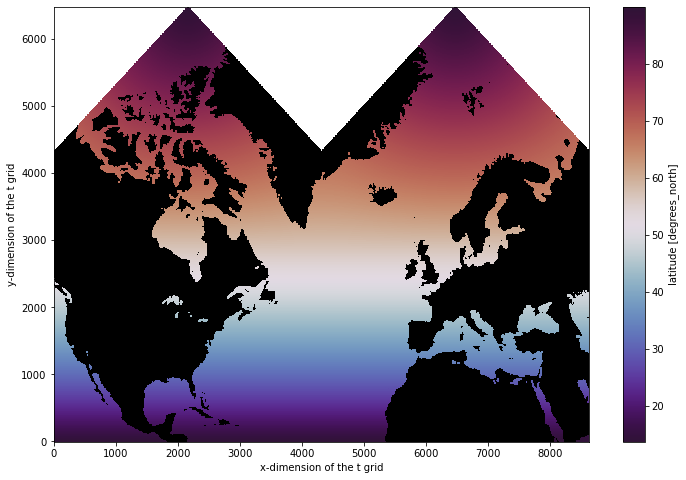

In [11]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['YC'].isel(X=slice(0,-1,10),Y=slice(0,-1,10))).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0)).plot(cmap='twilight_shifted')
plt.show()

## Centered around Arctic Ocean (North Atlantic at bottom)

In [12]:
DS = LLCtransformation.arctic_centered(_ds.isel(time=slice(0,2)), varlist, centered='Atlantic')

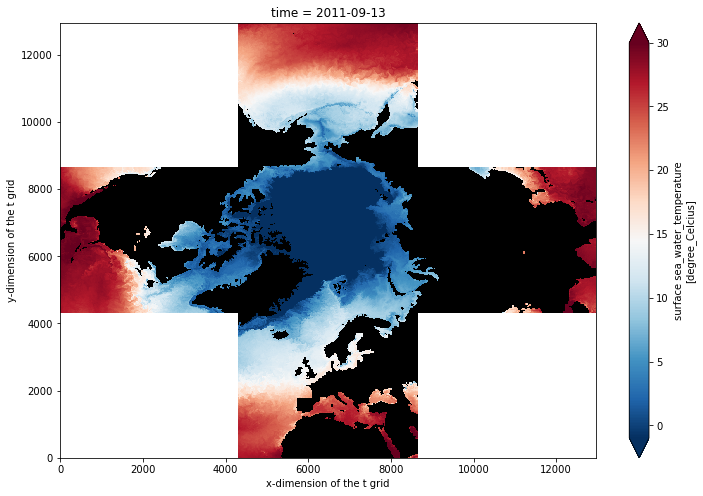

In [13]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['SST'].isel(time=0, X=slice(0,-1,10), Y=slice(0,-1,10)).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0))).plot(cmap='RdBu_r', vmin=-1, vmax=30)
plt.show()

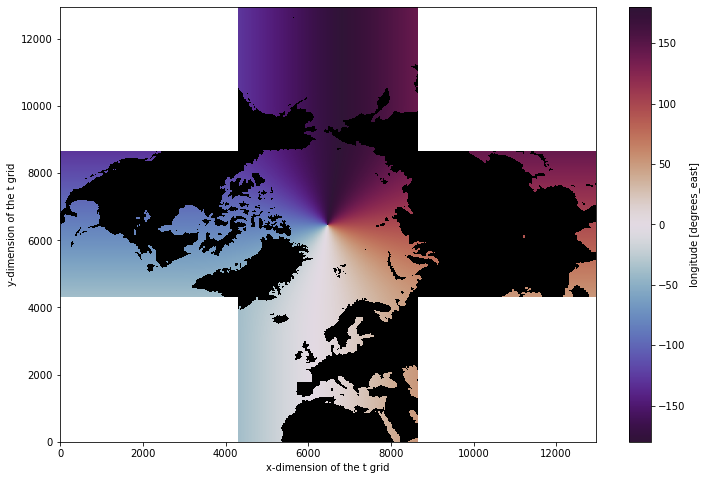

In [14]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['XC'].isel(X=slice(0,-1,10), Y=slice(0,-1,10)).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0))).plot(cmap='twilight_shifted')
plt.show()

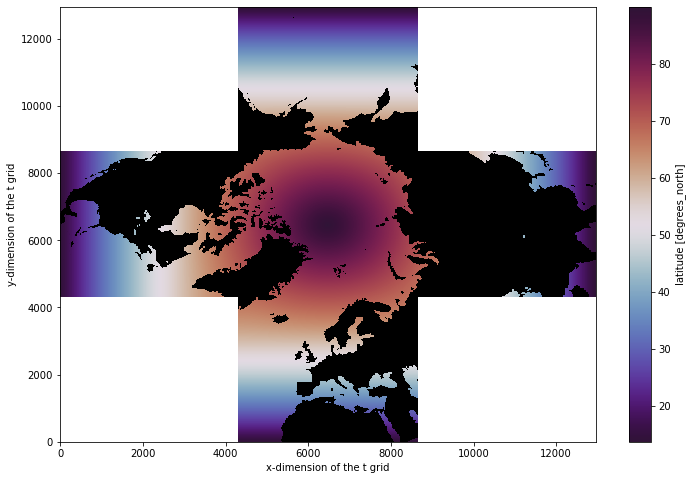

In [15]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['YC'].isel(X=slice(0,-1,10), Y=slice(0,-1,10)).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0))).plot(cmap='twilight_shifted')
plt.show()

## Pacific Ocean on bottom

In [16]:
DS = LLCtransformation.arctic_centered(_ds.isel(time=slice(0,2)), varlist, centered='Pacific')

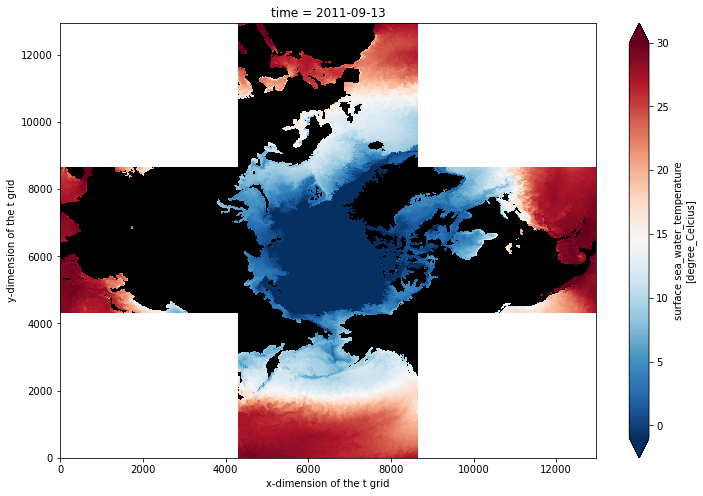

In [17]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['SST'].isel(time=0, X=slice(0,-1,10), Y=slice(0,-1,10)).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0))).plot(cmap='RdBu_r', vmin=-1, vmax=30)
plt.show()

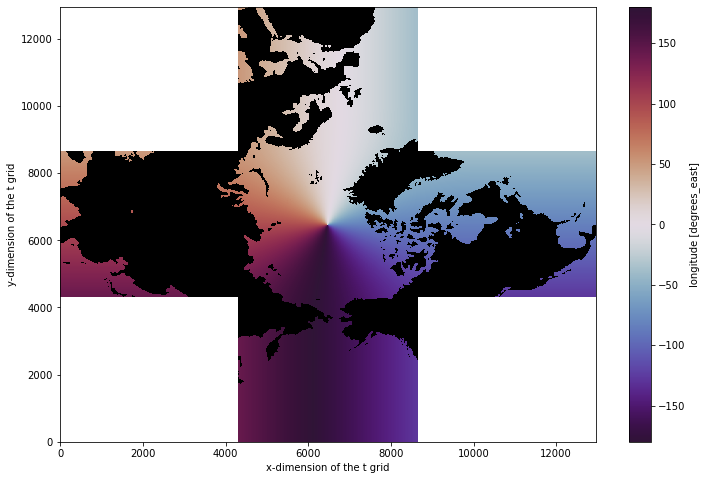

In [18]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['XC'].isel(X=slice(0,-1,10), Y=slice(0,-1,10)).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0))).plot(cmap='twilight_shifted')
plt.show()

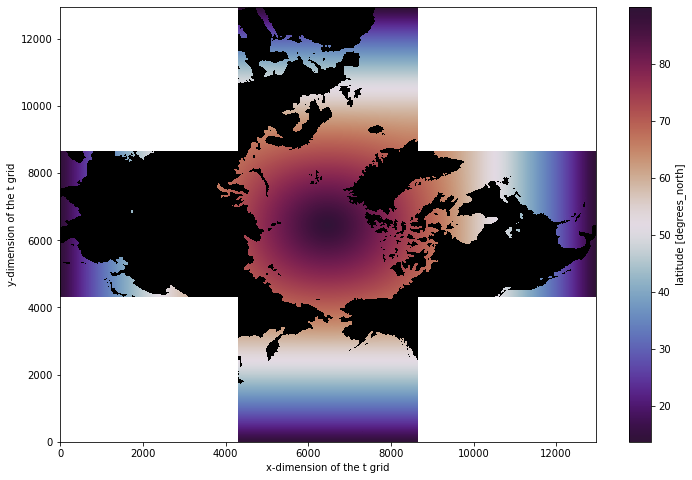

In [19]:
(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))).plot(cmap='Greys_r', add_colorbar=False)
((DS['YC'].isel(X=slice(0,-1,10), Y=slice(0,-1,10)).where(DS['Depth'].isel(X=slice(0,-1,10), Y=slice(0,-1,10))>0))).plot(cmap='twilight_shifted')
plt.show()